In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
file_name = pd.read_csv("sampleA-1.csv")

### STN, D1, D2 Heatmap Output (per episode)

In [ ]:
# Initial DataFrame
stn_result = pd.DataFrame()
d1_result = pd.DataFrame()
d2_result = pd.DataFrame()

# Set the range for i and j
for i in range(2, 9):
    for j in range(2, 9):
        """STN"""
        stn_column_name = f'lc_hyper{i}{j}'  # Create column name lc_hyperij
        stn_max_values = file_name.groupby(['episode'])[stn_column_name].max().reset_index()  # Calculate max values and reset index
        stn_max_values.rename(columns={stn_column_name: f'max_{stn_column_name}'}, inplace=True)  # Rename column
        
        if stn_result.empty:
            stn_result = stn_max_values  # Assign directly to stn_result for the first iteration
        else:
            stn_result = pd.merge(stn_result, stn_max_values, on='episode')  # Merge horizontally
            
        """D1"""
        d1_column_name = f'D1{i}{j}'  # Create column name D1ij
        d1_max_values = file_name.groupby(['episode'])[d1_column_name].max().reset_index()  # Calculate max values and reset index
        d1_max_values.rename(columns={d1_column_name: f'max_{d1_column_name}'}, inplace=True)  # Rename column
        
        if d1_result.empty:
            d1_result = d1_max_values  # Assign directly to d1_result for the first iteration
        else:
            d1_result = pd.merge(d1_result, d1_max_values, on='episode')  # Merge horizontally
            
        """D2"""
        d2_column_name = f'D2{i}{j}'  # Create column name D2ij
        d2_max_values = file_name.groupby(['episode'])[d2_column_name].max().reset_index()  # Calculate max values and reset index
        d2_max_values.rename(columns={d2_column_name: f'max_{d2_column_name}'}, inplace=True)  # Rename column
        
        if d2_result.empty:
            d2_result = d2_max_values  # Assign directly to d2_result for the first iteration
        else:
            d2_result = pd.merge(d2_result, d2_max_values, on='episode')  # Merge horizontally

STN


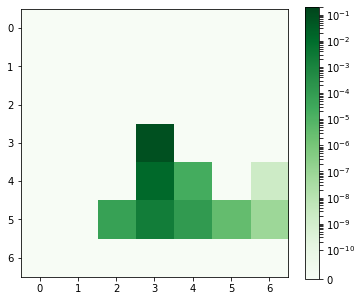

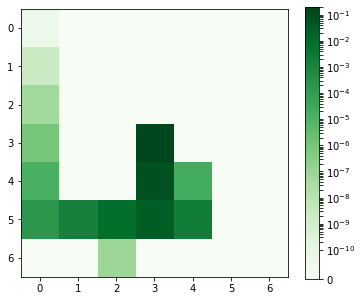

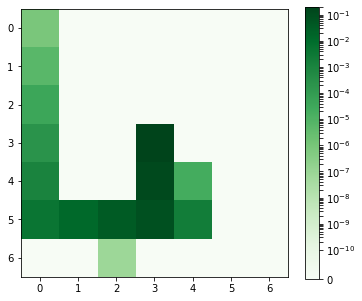

D1


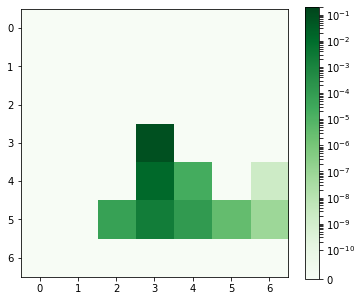

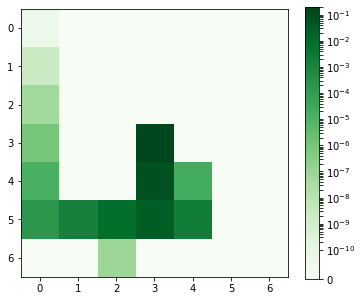

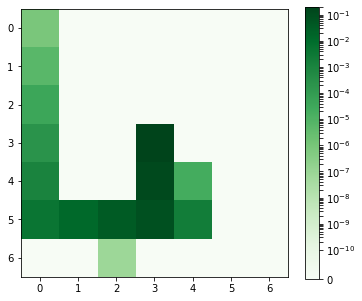

D2


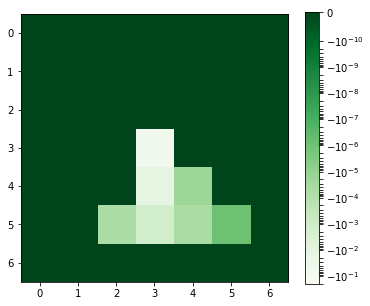

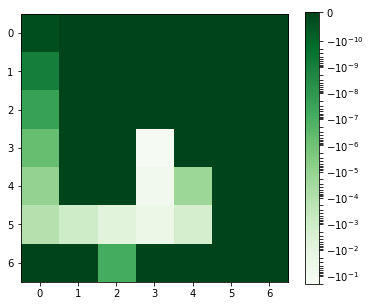

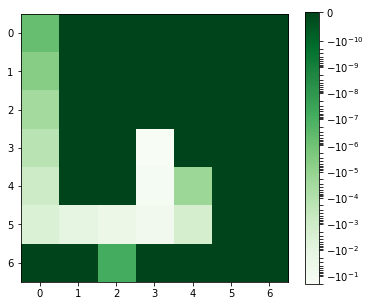

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.colors import SymLogNorm


epsilon = 1e-20
print('STN')
for ep in range(10, 51, 20):
    """STN"""
    # Extract rows with a specific episode number (e.g., 10), ep number starts from 1
    specific_episode = stn_result[stn_result['episode'] == ep]

    # Create a 7x7 DataFrame
    stn_heatmap_data = pd.DataFrame(index=range(2, 9), columns=range(2, 9))

    # Insert lc_hyperij data into heatmap_data
    for i in range(2, 9):
        for j in range(2, 9):
            column_name = f'max_lc_hyper{i}{j}'
            stn_heatmap_data.at[i, j] = specific_episode[column_name].values[0]
            if stn_heatmap_data.at[i,j]>=1:
                stn_heatmap_data.at[i,j] -= 1
                

    # Convert data to numeric type (if necessary)
    stn_heatmap_data = stn_heatmap_data.astype(float)
    stn_heatmap_data = np.where(stn_heatmap_data==0, epsilon, stn_heatmap_data)
    
    plt.figure(figsize=(6, 5))
#     stn_heatmap = plt.imshow(stn_heatmap_data, norm=LogNorm(vmin=stn_heatmap_data.min(), vmax=1e-1), cmap='Greens')

    stn_heatmap = plt.imshow(stn_heatmap_data, norm=SymLogNorm(linthresh=1e-10,vmin=0,vmax=0.2), cmap='Greens')


    # Add color bar
    cbar = plt.colorbar(stn_heatmap)

    # Display
    plt.show()

print('D1')
for ep in range(10, 51, 20):
    """D1"""
    # Extract rows with a specific episode number (e.g., 10), ep number starts from 1
    specific_episode = d1_result[d1_result['episode'] == ep]

    # Create a 7x7 DataFrame
    d1_heatmap_data = pd.DataFrame(index=range(2, 9), columns=range(2, 9))

    # Insert lc_hyperij data into heatmap_data
    for i in range(2, 9):
        for j in range(2, 9):
            column_name = f'max_D1{i}{j}'
            d1_heatmap_data.at[i, j] = specific_episode[column_name].values[0]
            if d1_heatmap_data.at[i,j]>=1:
                d1_heatmap_data.at[i,j] -= 1

    # Convert data to numeric type (if necessary)
    d1_heatmap_data = d1_heatmap_data.astype(float)
    d1_heatmap_data = np.where(d1_heatmap_data==0, epsilon, d1_heatmap_data)

    plt.figure(figsize=(6, 5))
#     d1_heatmap = plt.imshow(d1_heatmap_data, norm=LogNorm(vmin=d1_heatmap_data.min(), vmax=1e-1), cmap='Greens')
    d1_heatmap = plt.imshow(d1_heatmap_data, norm=SymLogNorm(linthresh=1e-10,vmin=0,vmax=0.2), cmap='Greens')


    # Add color bar
    cbar = plt.colorbar(d1_heatmap)

    # Display
    plt.show()

print('D2')    
for ep in range(10, 51, 20):
    """D2"""
    # Extract rows with a specific episode number (e.g., 10), ep number starts from 1
    specific_episode = d2_result[d2_result['episode'] == ep]

    # Create a 7x7 DataFrame
    d2_heatmap_data = pd.DataFrame(index=range(2, 9), columns=range(2, 9))

    # Insert lc_hyperij data into heatmap_data
    for i in range(2, 9):
        for j in range(2, 9):
            column_name = f'max_D2{i}{j}'
            d2_heatmap_data.at[i, j] = specific_episode[column_name].values[0]
            if d2_heatmap_data.at[i,j]<=1 and d2_heatmap_data.at[i,j]!=0:
                d2_heatmap_data.at[i,j] -= 1

    # Convert data to numeric type (if necessary)
    d2_heatmap_data = d2_heatmap_data.astype(float)
    d2_heatmap_data = np.where(d2_heatmap_data==0, epsilon, d2_heatmap_data)
    plt.figure(figsize=(6, 5))
#     d2_heatmap = plt.imshow(d2_heatmap_data, norm=LogNorm(vmin=1e-10, vmax=1e+1), cmap='Greens')

    d2_heatmap = plt.imshow(d2_heatmap_data, norm=SymLogNorm(linthresh=1e-10,vmin=-0.2,vmax=0), cmap='Greens')


    # Add color bar
    cbar = plt.colorbar(d2_heatmap)

    # Display
    plt.show()

### wSTN, wD1, wD2 Heatmap Output (per episode)

In [ ]:
# Initial DataFrame
wstn_result = pd.DataFrame()
wd1_result = pd.DataFrame()
wd2_result = pd.DataFrame()

# Set the range for i and j
for i in range(2, 9):
    for j in range(2, 9):
        """wSTN"""
        wstn_column_name = f'wstn{i}{j}'  # Create column name wstnij
        wstn_max_values = file_name.groupby(['episode'])[wstn_column_name].max().reset_index()  # Calculate max values and reset index
        wstn_max_values.rename(columns={wstn_column_name: f'max_{wstn_column_name}'}, inplace=True)  # Rename column
        
        if wstn_result.empty:
            wstn_result = wstn_max_values  # Assign directly to wstn_result for the first iteration
        else:
            wstn_result = pd.merge(wstn_result, wstn_max_values, on='episode')  # Merge horizontally
            
        """wd1"""
        wd1_column_name = f'wd1{i}{j}'  # Create column name wd1ij
        wd1_max_values = file_name.groupby(['episode'])[wd1_column_name].max().reset_index()  # Calculate max values and reset index
        wd1_max_values.rename(columns={wd1_column_name: f'max_{wd1_column_name}'}, inplace=True)  # Rename column
        
        if wd1_result.empty:
            wd1_result = wd1_max_values  # Assign directly to wd1_result for the first iteration
        else:
            wd1_result = pd.merge(wd1_result, wd1_max_values, on='episode')  # Merge horizontally
            
        """wd2"""
        wd2_column_name = f'wd2{i}{j}'  # Create column name wd2ij
        wd2_max_values = file_name.groupby(['episode'])[wd2_column_name].max().reset_index()  # Calculate max values and reset index
        wd2_max_values.rename(columns={wd2_column_name: f'max_{wd2_column_name}'}, inplace=True)  # Rename column
        
        if wd2_result.empty:
            wd2_result = wd2_max_values  # Assign directly to wd2_result for the first iteration
        else:
            wd2_result = pd.merge(wd2_result, wd2_max_values, on='episode')  # Merge horizontally

wstn


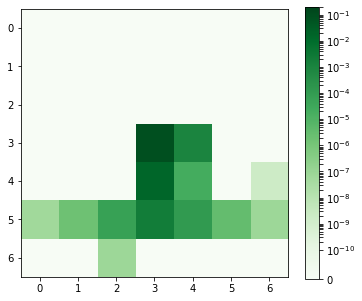

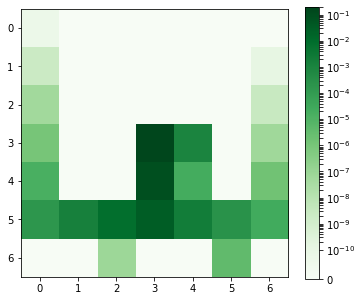

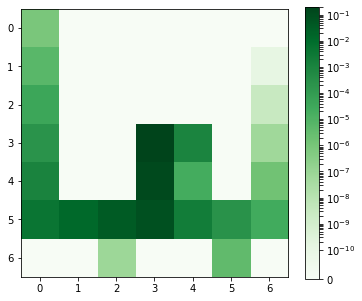

wd1


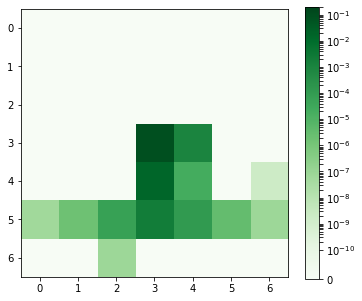

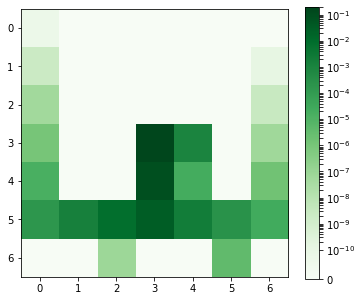

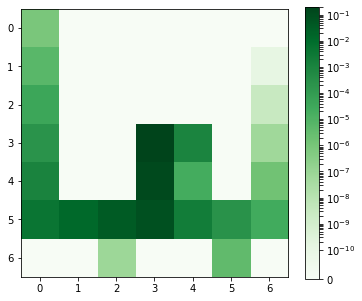

wd2


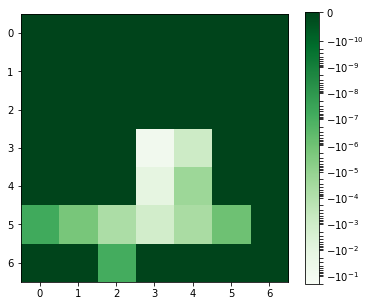

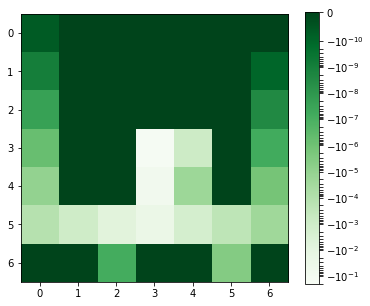

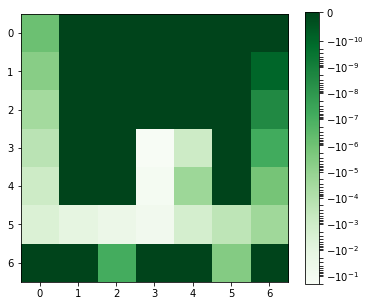

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.colors import SymLogNorm
epsilon = 1e-20
                

print('wstn')
for ep in range(10, 51, 20):
    """wstn"""
    # Extract rows with a specific episode number (e.g., 10), ep number starts from 1
    specific_episode = wstn_result[wstn_result['episode'] == ep]

    # Create a 7x7 DataFrame
    wstn_heatmap_data = pd.DataFrame(index=range(2, 9), columns=range(2, 9))

    # Insert lc_hyperij data into heatmap_data
    for i in range(2, 9):
        for j in range(2, 9):
            column_name = f'max_wstn{i}{j}'
            wstn_heatmap_data.at[i, j] = specific_episode[column_name].values[0]
            if wstn_heatmap_data.at[i,j]>=1:
                wstn_heatmap_data.at[i,j] -= 1
            

    # Convert data to numeric type (if necessary)

    wstn_heatmap_data = wstn_heatmap_data.astype(float)
    wstn_heatmap_data = np.where(wstn_heatmap_data==0, epsilon, wstn_heatmap_data)
    
    plt.figure(figsize=(6, 5))
    wstn_heatmap = plt.imshow(wstn_heatmap_data, norm=SymLogNorm(linthresh=1e-10,vmin=0,vmax=0.2), cmap='Greens')

    # Add color bar
    cbar = plt.colorbar(wstn_heatmap)

    # Display
    plt.show()
    

print('wd1')
for ep in range(10, 51, 20):
    """wd1"""
    # Extract rows with a specific episode number (e.g., 10), ep number starts from 1
    specific_episode = wd1_result[wd1_result['episode'] == ep]

    # Create a 7x7 DataFrame
    wd1_heatmap_data = pd.DataFrame(index=range(2, 9), columns=range(2, 9))

    # Insert lc_hyperij data into heatmap_data
    for i in range(2, 9):
        for j in range(2, 9):
            column_name = f'max_wd1{i}{j}'
            wd1_heatmap_data.at[i, j] = specific_episode[column_name].values[0]
            if wd1_heatmap_data.at[i,j]>=1:
                wd1_heatmap_data.at[i,j] -= 1
            

    # Convert data to numeric type (if necessary)

    wd1_heatmap_data = wd1_heatmap_data.astype(float)
    wd1_heatmap_data = np.where(wd1_heatmap_data==0, epsilon, wd1_heatmap_data)
    
    plt.figure(figsize=(6, 5))
    wd1_heatmap = plt.imshow(wd1_heatmap_data, norm=SymLogNorm(linthresh=1e-10,vmin=0,vmax=0.2), cmap='Greens')

    # Add color bar
    cbar = plt.colorbar(wd1_heatmap)

    # Display
    plt.show()

print('wd2')    
for ep in range(10, 51, 20):
    """wd2"""
    # Extract rows with a specific episode number (e.g., 10), ep number starts from 1
    specific_episode = wd2_result[wd2_result['episode'] == ep]

    # Create a 7x7 DataFrame
    wd2_heatmap_data = pd.DataFrame(index=range(2, 9), columns=range(2, 9))

    # Insert lc_hyperij data into heatmap_data
    for i in range(2, 9):
        for j in range(2, 9):
            column_name = f'max_wd2{i}{j}'
            wd2_heatmap_data.at[i, j] = specific_episode[column_name].values[0]
            if wd2_heatmap_data.at[i,j]<=1 and wd2_heatmap_data.at[i,j]!=0:
                wd2_heatmap_data.at[i,j] -= 1

    # Convert data to numeric type (if necessary)
    wd2_heatmap_data = wd2_heatmap_data.astype(float)
    wd2_heatmap_data = np.where(wd2_heatmap_data==0, epsilon, wd2_heatmap_data)
    plt.figure(figsize=(6, 5))

    wd2_heatmap = plt.imshow(wd2_heatmap_data, norm=SymLogNorm(linthresh=1e-10,vmin=-0.2,vmax=0), cmap='Greens')


    # Add color bar
    cbar = plt.colorbar(wd2_heatmap)

    # Display
    plt.show()

### 　　↓↓↓original↓↓↓

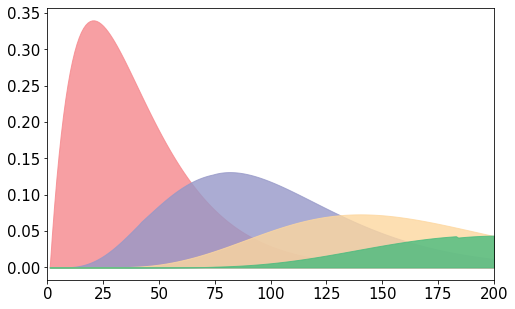

In [27]:
a=0.8
x = np.arange(1, 201)

plt.figure(figsize=(8,5))
plt.xlim(0, 200)
# plt.xlabel('Episode')
# plt.ylabel('Maximum activity of dopamine cells')
plt.rcParams["font.size"] = 15

plt.fill_between(x, file_name.groupby(['episode'])['DA65'].max(), alpha=a, color='#F6878C',label='(4,3), Down')
plt.fill_between(x, file_name.groupby(['episode'])['DA73'].max(), alpha=a, color='#9698C8',label='(5,1), Down')
plt.fill_between(x, file_name.groupby(['episode'])['DA52'].max(), alpha=a, color='#FDD79F',label='(3,0), Right')
plt.fill_between(x, file_name.groupby(['episode'])['DA22'].max(), alpha=a, color='#48BB7E',label='(0,0), Down')
# plt.legend()

1. Enter the name of the CSV file you want to read into `file_name`.
2. Execute the two tabs directly below.
3. The top-left coordinate is "DA22", and the bottom-right coordinate is "DA88".
4. Input the target coordinate "DA??" for extraction.

In [26]:
file_name = pd.read_csv("sampleA-4_200steps.csv")

<Figure size 432x288 with 0 Axes>

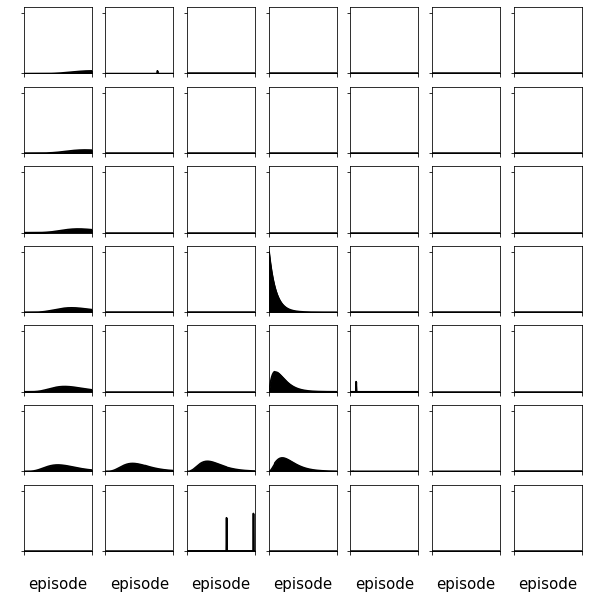

In [11]:
x = np.arange(1,201)

plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.figure(figsize=(10,10))

a, n = 1, 1
c = 'black'

for i in range(2, 9):
    for j in range(2, 9):
        plt.subplot(7, 7, n)
        plt.xticks(color="None")
        plt.yticks(color="None")
        plt.xlim(0,200)
        plt.ylim(0, 1.1)
        file_name.groupby(['episode'])['DA{}{}'.format(i,j)].max().plot(color=c)
        plt.fill_between(x, file_name.groupby(['episode'])['DA{}{}'.format(i,j)].max(), alpha=a, color=c)
        n += 1
        
# plt.savefig('DA_transition_on_maze.svg')

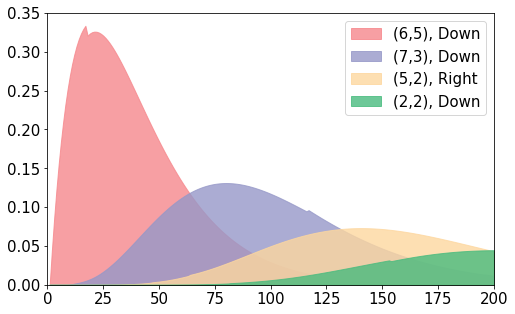

In [27]:
a=0.8
x = np.arange(1, 201)

plt.figure(figsize=(8,5))
plt.xlim(0, 200)
plt.ylim(0, 0.35)
# plt.xlabel('Episode')
# plt.ylabel('Maximum activity of dopamine cells')
plt.rcParams["font.size"] = 15

plt.fill_between(x, file_name.groupby(['episode'])['DA65'].max(), alpha=a, color='#F6878C',label='(6,5), Down')
plt.fill_between(x, file_name.groupby(['episode'])['DA73'].max(), alpha=a, color='#9698C8',label='(7,3), Down')
plt.fill_between(x, file_name.groupby(['episode'])['DA52'].max(), alpha=a, color='#FDD79F',label='(5,2), Right')
plt.fill_between(x, file_name.groupby(['episode'])['DA22'].max(), alpha=a, color='#48BB7E',label='(2,2), Down')
# plt.savefig('DA_transition_overlap.svg')
plt.legend()

### V'-V on the pathway

state: 22


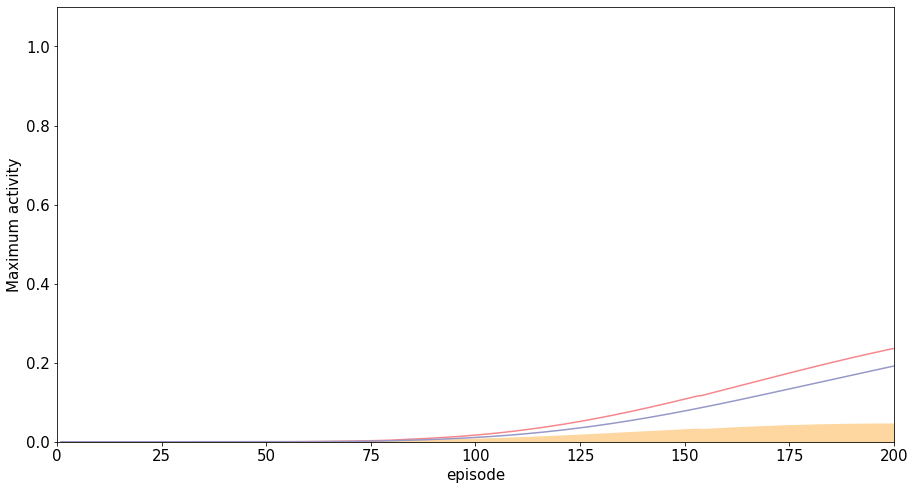

state: 32


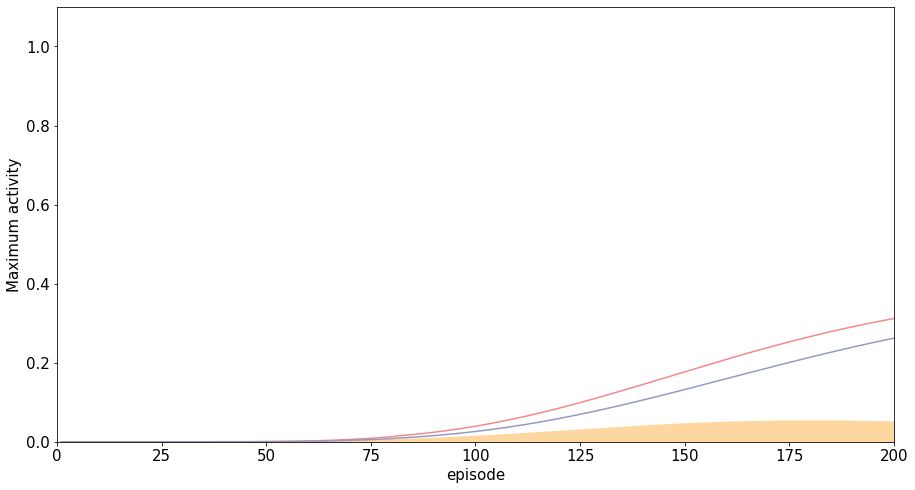

state: 42


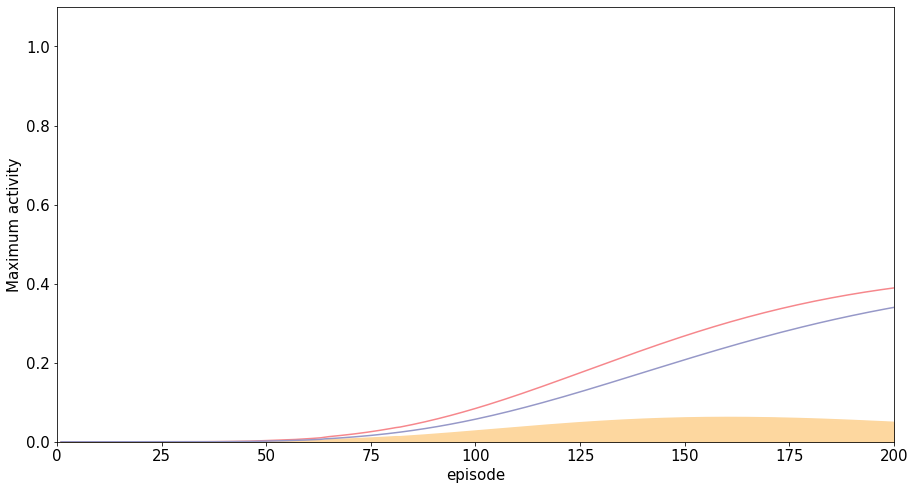

state: 52


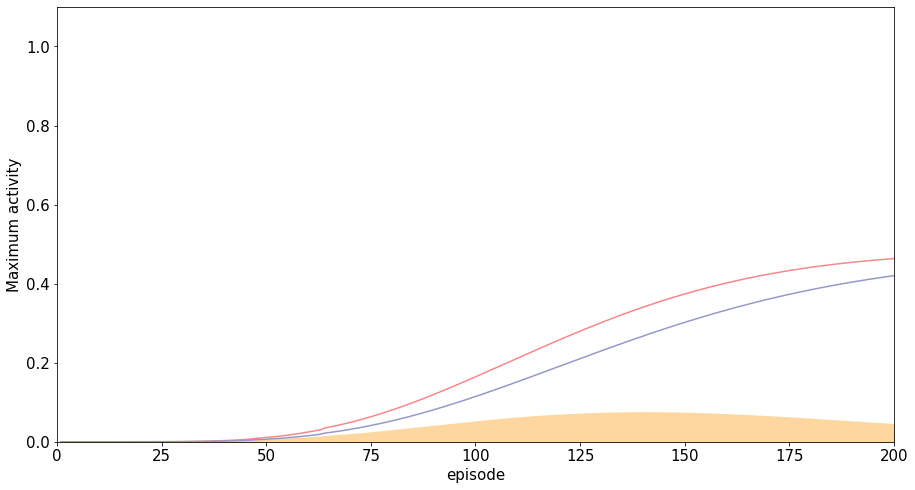

state: 62


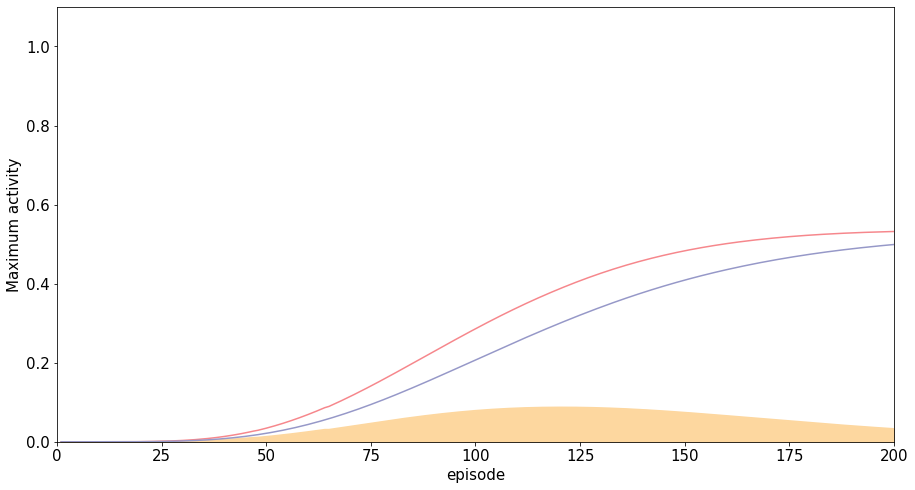

state: 72


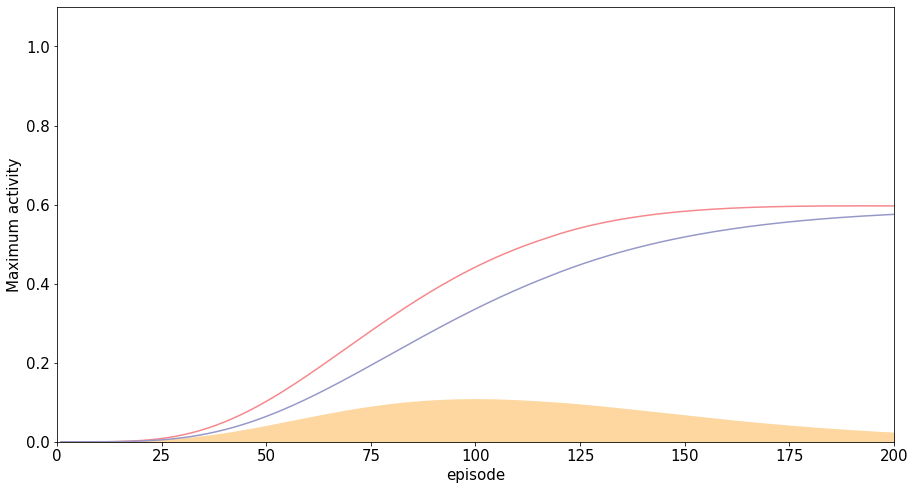

state: 73


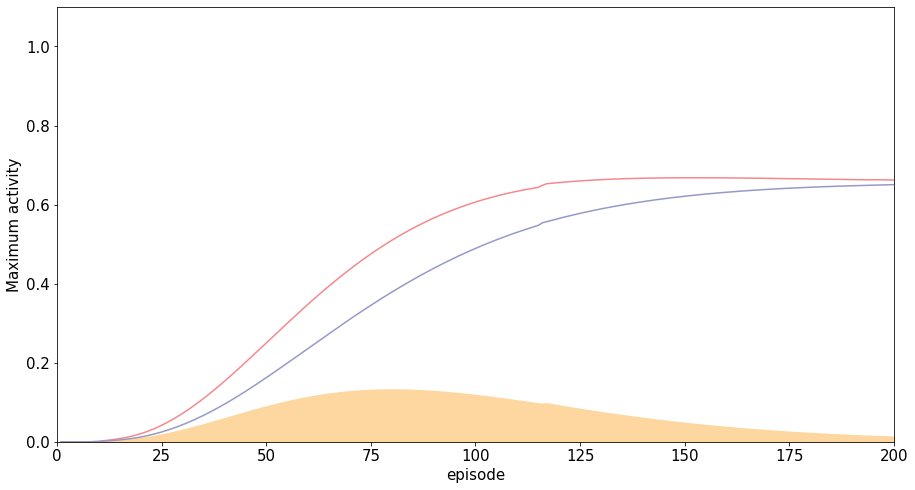

state: 74


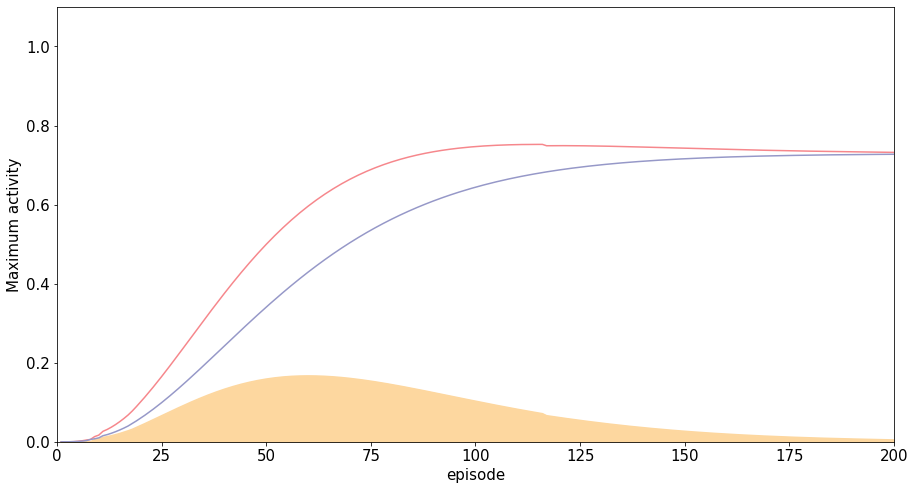

state: 75


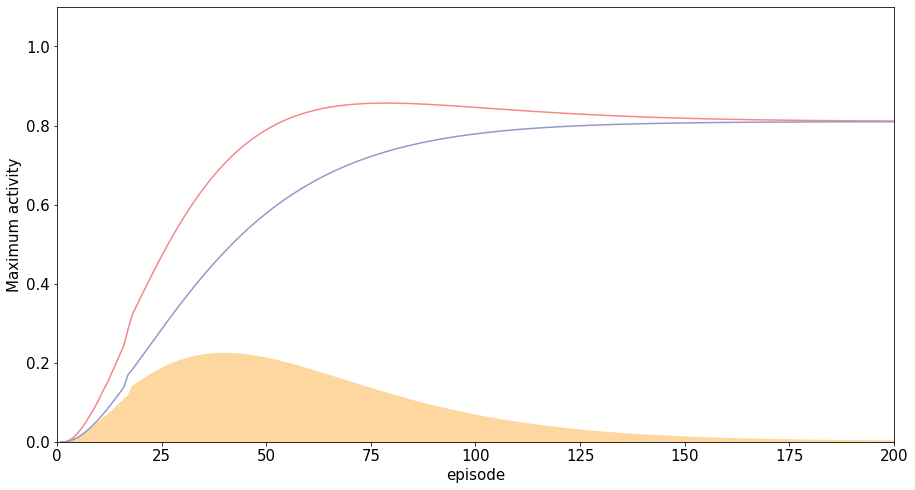

state: 65


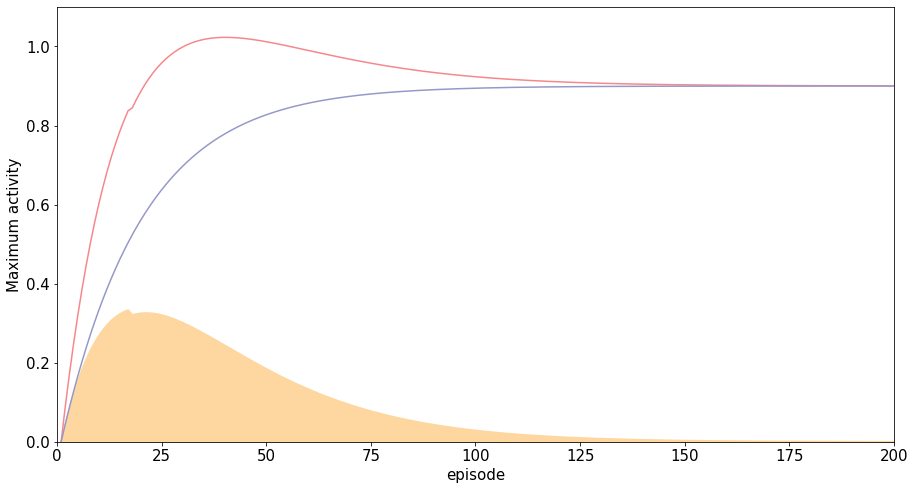

In [30]:
x = np.arange(1, 201)
pathway = [22,32,42,52,62,72,73,74,75,65]
pathway2 = [32,42,52,62,72,73,74,75,65,55]


for i in range(len(pathway)):
    plt.figure(figsize=(15,8))
    plt.xlabel('Episode')
    plt.ylabel('Maximum activity')
    plt.xlim(0,200)
    plt.ylim(0,1.1)
    plt.rcParams["font.size"] = 15
    
    print('state:',pathway[i])
    str_da = str(pathway[i])
    str_gl = str(pathway2[i])
    plt.fill_between(x, file_name.groupby(['episode'])['DA'+str_da].max(),color='#FDD79F')
    file_name.groupby(['episode'])['DA'+str_da].max().plot(color='#FDD79F',label='Dopamin')
    df1 = (file_name.groupby(['episode'])['strio'+str_da].max()+5*(file_name.groupby(['episode'])['gl_hyper'+str_gl].max()-file_name.groupby(['episode'])['gl_gpe'+str_gl].min()-1.1))
    df2 = (-(-5*(file_name.groupby(['episode'])['gl_hyper'+str_gl].max()-file_name.groupby(['episode'])['gl_gpe'+str_gl].min()-1.1)))
    
    df1.replace(-5.5, 0, inplace=True)
    df2.replace(-5.5, 0, inplace=True)
    df1.plot(color='#F6878C',label='Reward + HyperDirect(Global) + Indirect(Global)')
    df2.plot(color='#9698C8',label='HyperDirect - Direct + Indirect')
#     plt.legend()
#     plt.savefig('gl-lc=da_'+str(pathway[i])+'.svg')
    plt.show()